<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/IPhone_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logestic Regression Project-IPhone Purchase

### Import liberaries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### About Dataset:
Iphone Purchases are getting increased day by day and many stores wants to predict whether a customer will purchase an Iphone from thier store given their gender, age and salary.The dataset includes 400 samples and 4 features.

### Read data

In [83]:
#create dataframe by pandas
df = pd.read_csv('iphone_purchase_records.csv')

## EDA

In [84]:
#check the top 5 data
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [85]:
#check the name of columns
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [86]:
#check the dimentions of data
df.shape

(400, 4)

In [87]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [88]:
#check statistical description of data
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Visualization

### Boxplot

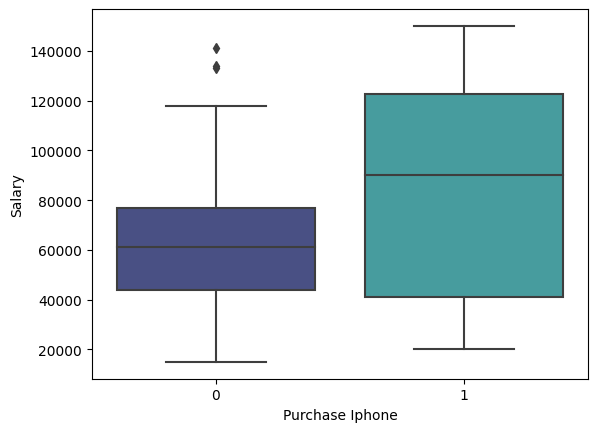

In [89]:
sns.boxplot(data=df,x = 'Purchase Iphone',y='Salary',palette='mako');

### The plot shows that purchasing an iPhone for people with an average salary of 60000 is not affordable while it is affordable for people with an average salary of 90000.

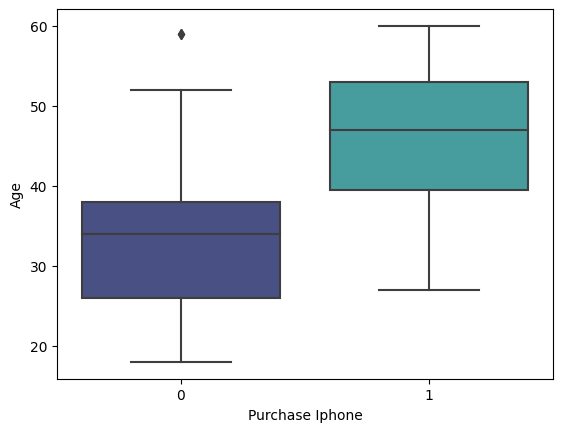

In [90]:
sns.boxplot(data=df,x = 'Purchase Iphone',y='Age',palette='mako');

### The average age of people who aren't able to purchase iPhones is about 35 while for people who can purchase iPhones is about 47.

## Convert Categorical Data by LabelEncoder

In [91]:
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
LE = LabelEncoder()

In [94]:
df['Gender']=LE.fit_transform(df['Gender'])

## Tarin Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchase Iphone', axis = 1),df['Purchase Iphone'],test_size= 0.25,random_state= 101)

In [97]:
from sklearn.preprocessing import StandardScaler

## Scaling

In [98]:
sc = StandardScaler()

In [99]:
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

## Building Logestic Regression Model

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
classifier= LogisticRegression(random_state=101 , solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(random_state=101, solver='liblinear')

In [102]:
pred = classifier.predict(X_test)

## Evaluation

In [103]:
from sklearn import metrics

In [104]:
cm = metrics.confusion_matrix(y_test,pred)
recall = metrics.accuracy_score(y_test,pred)
precision= metrics.precision_score(y_test,pred)

In [105]:
print(cm)
print(precision)
print(recall)

[[59  6]
 [12 23]]
0.7931034482758621
0.82


## Results:


*   True Positive (TP): 23
*   True Negative (TN): 59
*   False Positive (FP): 6
*   False Negative (FN): 12

In summary, the model has an accuracy of around 79.31%, a precision of 79.31%, and a recall of 65.71%. These metrics provide insights into different aspects of the model's performance in a binary classification setting.



## Testing the Model by 8 samples

In [106]:
x1 = sc.transform([[1,21,40000]])
x2 = sc.transform([[1,21,80000]])
x3 = sc.transform([[0,21,40000]])
x4 = sc.transform([[0,21,80000]])
x5 = sc.transform([[1,41,40000]])
x6 = sc.transform([[1,41,80000]])
x7 = sc.transform([[0,41,40000]])
x8 = sc.transform([[0,68,80000]])
print("Male aged 21 making $40k will buy iPhone:", classifier.predict(x1))
print("Male aged 21 making $80k will buy iPhone:", classifier.predict(x2))
print("Female aged 21 making $40k will buy iPhone:", classifier.predict(x3))
print("Female aged 21 making $80k will buy iPhone:", classifier.predict(x4))
print("Male aged 41 making $40k will buy iPhone:", classifier.predict(x5))
print("Male aged 41 making $80k will buy iPhone:", classifier.predict(x6))
print("Female aged 41 making $40k will buy iPhone:", classifier.predict(x7))
print("Female aged 68 making $80k will buy iPhone:", classifier.predict(x8))

Male aged 21 making $40k will buy iPhone: [0]
Male aged 21 making $80k will buy iPhone: [0]
Female aged 21 making $40k will buy iPhone: [0]
Female aged 21 making $80k will buy iPhone: [0]
Male aged 41 making $40k will buy iPhone: [0]
Male aged 41 making $80k will buy iPhone: [1]
Female aged 41 making $40k will buy iPhone: [0]
Female aged 68 making $80k will buy iPhone: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 